# Week 2 Lesson 2 Assignment

## Problem 1

In [10]:
import numpy as np

csv_path = "mtfuji_data.csv" 
np.set_printoptions(suppress=True) 
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [11]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


Text(0, 0.5, 'elevation[m]')

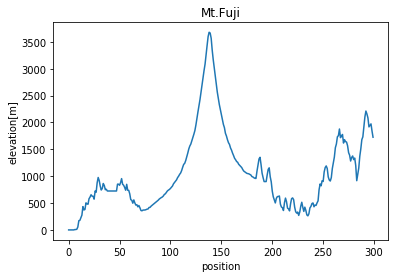

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fuji[:,0],fuji[:,3])
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')

## Problem 2

In [13]:
def calculate_gradient(point):
    x0 = point-1
    x1 = point+1
    y0 = fuji[fuji[:,0]==x0,3]
    y1 = fuji[fuji[:,0]==x1,3]
    d_xy = (y1-y0)/(x1-x0)
    return d_xy

In [17]:
calculate_gradient(100)

array([20.785])

## Problem 3

In [34]:
def destination(present_point,alpha=0.2):
    grad_present_point = calculate_gradient(present_point)
    present_point_update = np.round(present_point - alpha * grad_present_point)
    if present_point_update <= 1:
        present_point_update = 1
    if present_point_update > 298:
        present_point_update = 298
    return grad_present_point,present_point_update

## Problem 4

In [37]:
def down_the_mountain(current_point):
    current_point_list = [current_point]
    gd_list = []  
    gd = 1000
    current_point_update = current_point
    i=0
    while np.abs(gd) > 5:
        gra,current_point_update = destination(current_point_update)
        current_point_list.append(current_point_update)
        gd = gra
        gd_list.append(float(gd))
        i += 1
    return current_point_list,gd_list

In [40]:
current_point_list,gd_list = down_the_mountain(136)
update_position = current_point_list[-1]
upd_position_grad = gd_list[-1]
print('The new position is: {}'.format(update_position))
print('Gradient of the new point is: {:.3f}'.format(upd_position_grad))

The new position is: [74.]
Gradient of the new point is: 1.140


## Problem 5

[3434, 858, 700, 602, 575, 505, 458, 418, 377, 371, 371]


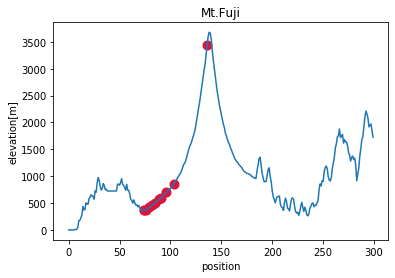

In [42]:
#Let's visualize the previous results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fuji[:,0],fuji[:,3])
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
new_list = []
for current_point in current_point_list:
    y = fuji[fuji[:,0]==current_point,3]
    new_list.append(int(y))
print(list(new_list))
plt.scatter(current_point_list,new_list,color='crimson',linewidth = 4)

## Problem 6

In [45]:
def down_the_mountain_general(current_point):
    current_point_list = [current_point]
    gd_list = []  
    gd = 1000
    current_point_update = current_point  
    for _ in range(100):
        gra,current_point_update = destination(current_point_update)
        current_point_list.append(float(current_point_update))
        gd = gra
        gd_list.append(float(gd))
    return current_point_list,gd_list

- Now let's pick three points (35, 180 and 280) as initial values and see how it affects the results by showing them in the graph.

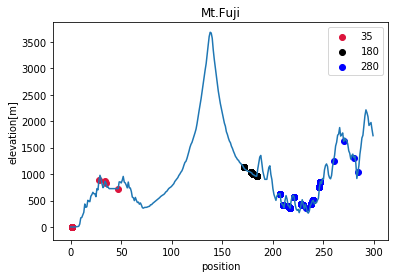

In [53]:
plt.plot(fuji[:,0],fuji[:,3])
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')

current_point_list_35,gd_list_35 = down_the_mountain_general(35)
current_point_list_180,gd_list_180 = down_the_mountain_general(180)
current_point_list_280,gd_list_280 = down_the_mountain_general(270)

new_list_35 = []
new_list_180 = []
new_list_280 = []

current_point_lists = [current_point_list_35,current_point_list_180,current_point_list_280]
new_lists = [new_list_35,new_list_180,new_list_280]
colors=('crimson','black','blue')
starts = [35,180,280]
for start, current_point_list,c,new_list in zip(starts, current_point_lists,colors,new_lists):
    for current_point in (current_point_list):
        y = fuji[fuji[:,0]==current_point,3]
        new_list.append(int(y))
    plt.scatter(current_point_list,new_list,color=c,label=str(start))
plt.legend()

## Problem 7

- Let's now change the value of alpha and see how the results will change. We will consider the position 136 with α = 10, α = 20 and α = 35. For that let's define a more general function with the current position, alpha and the number of times (x).

In [86]:
def changing_alpha(current_position=136, x=100, alpha=1):
    position = []
    grad_list = []
    height_list = []
    for i in range(x):
        if current_position == len(fuji+1):
            break       
        grad_list.append(calculate_gradient(current_position))
        height_list.append(fuji[current_position,3])
        position.append(current_position)
        if calculate_gradient(current_position) > 0:
            current_position -= alpha
        elif calculate_gradient(current_position) < 0:
            current_position += alpha
        else:
            break
    return position, height_list, grad_list

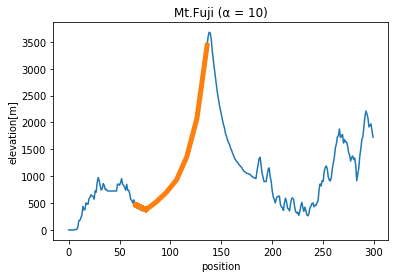

In [90]:
current_position, height, grad = changing_alpha(current_position=136, x=100, alpha=10)
plt.title("Mt.Fuji (α = 10)")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:,3])
plt.plot(current_position,height,linewidth = 5.0)
plt.show()

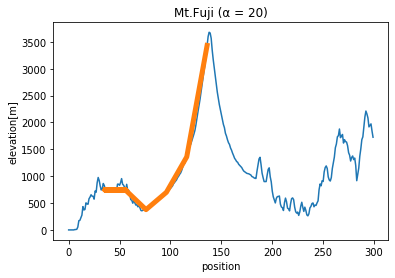

In [91]:
current_position, height, grad = changing_alpha(current_position=136, x=100, alpha=20)
plt.title("Mt.Fuji (α = 20)")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:,3])
plt.plot(current_position,height,linewidth = 5.0)
plt.show()

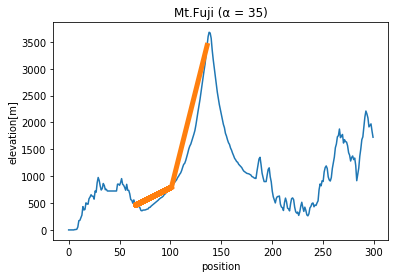

In [94]:
current_position, height, grad = changing_alpha(current_position=136, x=100, alpha=35)
plt.title("Mt.Fuji (α = 35)")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:,3])
plt.plot(current_position,height,linewidth = 5.0)
plt.show()